In [6]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
from matplotlib import pyplot as plt
from decimal import Decimal
import data_preprocessing
import mlxtend
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import utils
import tensorflow as tf
from decimal import Decimal
import model
from biosppy.signals import tools as tools
import pytorch_lightning as pl


In [4]:
%pip install mlxtend 
%pip install openpyxl
%pip install -U ipykernel
%pip install biosppy
%pip install pytorch-lightning

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/8

**Choose the correct channel**

In [3]:
def csv_to_list(Path):
    with open(Path,'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        my_list = []
        for row in lines:
            for e in row:
                my_list.append(float(e))
    return my_list

In [4]:
def filter_ecg(signal, sampling_rate):
    
    signal = np.array(signal)
    order = int(0.3 * sampling_rate)
    filtered, _, _ = tools.filter_signal(signal=signal,
                                  ftype='FIR',
                                  band='bandpass',
                                  order=order,
                                  frequency=[3, 45],
                                  sampling_rate=sampling_rate)
    
    return filtered

In [5]:
before_filter = csv_to_list('./matlab/pp9.csv')
after_filter = filter_ecg(before_filter,256)
plt.subplot(1,2,1)
plt.plot(before_filter[:300])
plt.title("before_filter")

plt.subplot(1,2,2)
plt.plot(after_filter[:300])
plt.title("after_filter")


FileNotFoundError: [Errno 2] No such file or directory: './matlab/pp9.csv'

**All samples before and after filtering**

In [6]:
sample_path = './swell/PP9/sample/'
samples, _ = data_preprocessing.import_filenames(sample_path)
raw=[]
filtered=[]
for s in samples:
    r = data_preprocessing.csv_to_list(sample_path+s)
    raw.append(r)
    filtered.append(data_preprocessing.filter_ecg(r,256))


dir path in import_filenames is  ./swell/PP9/sample/


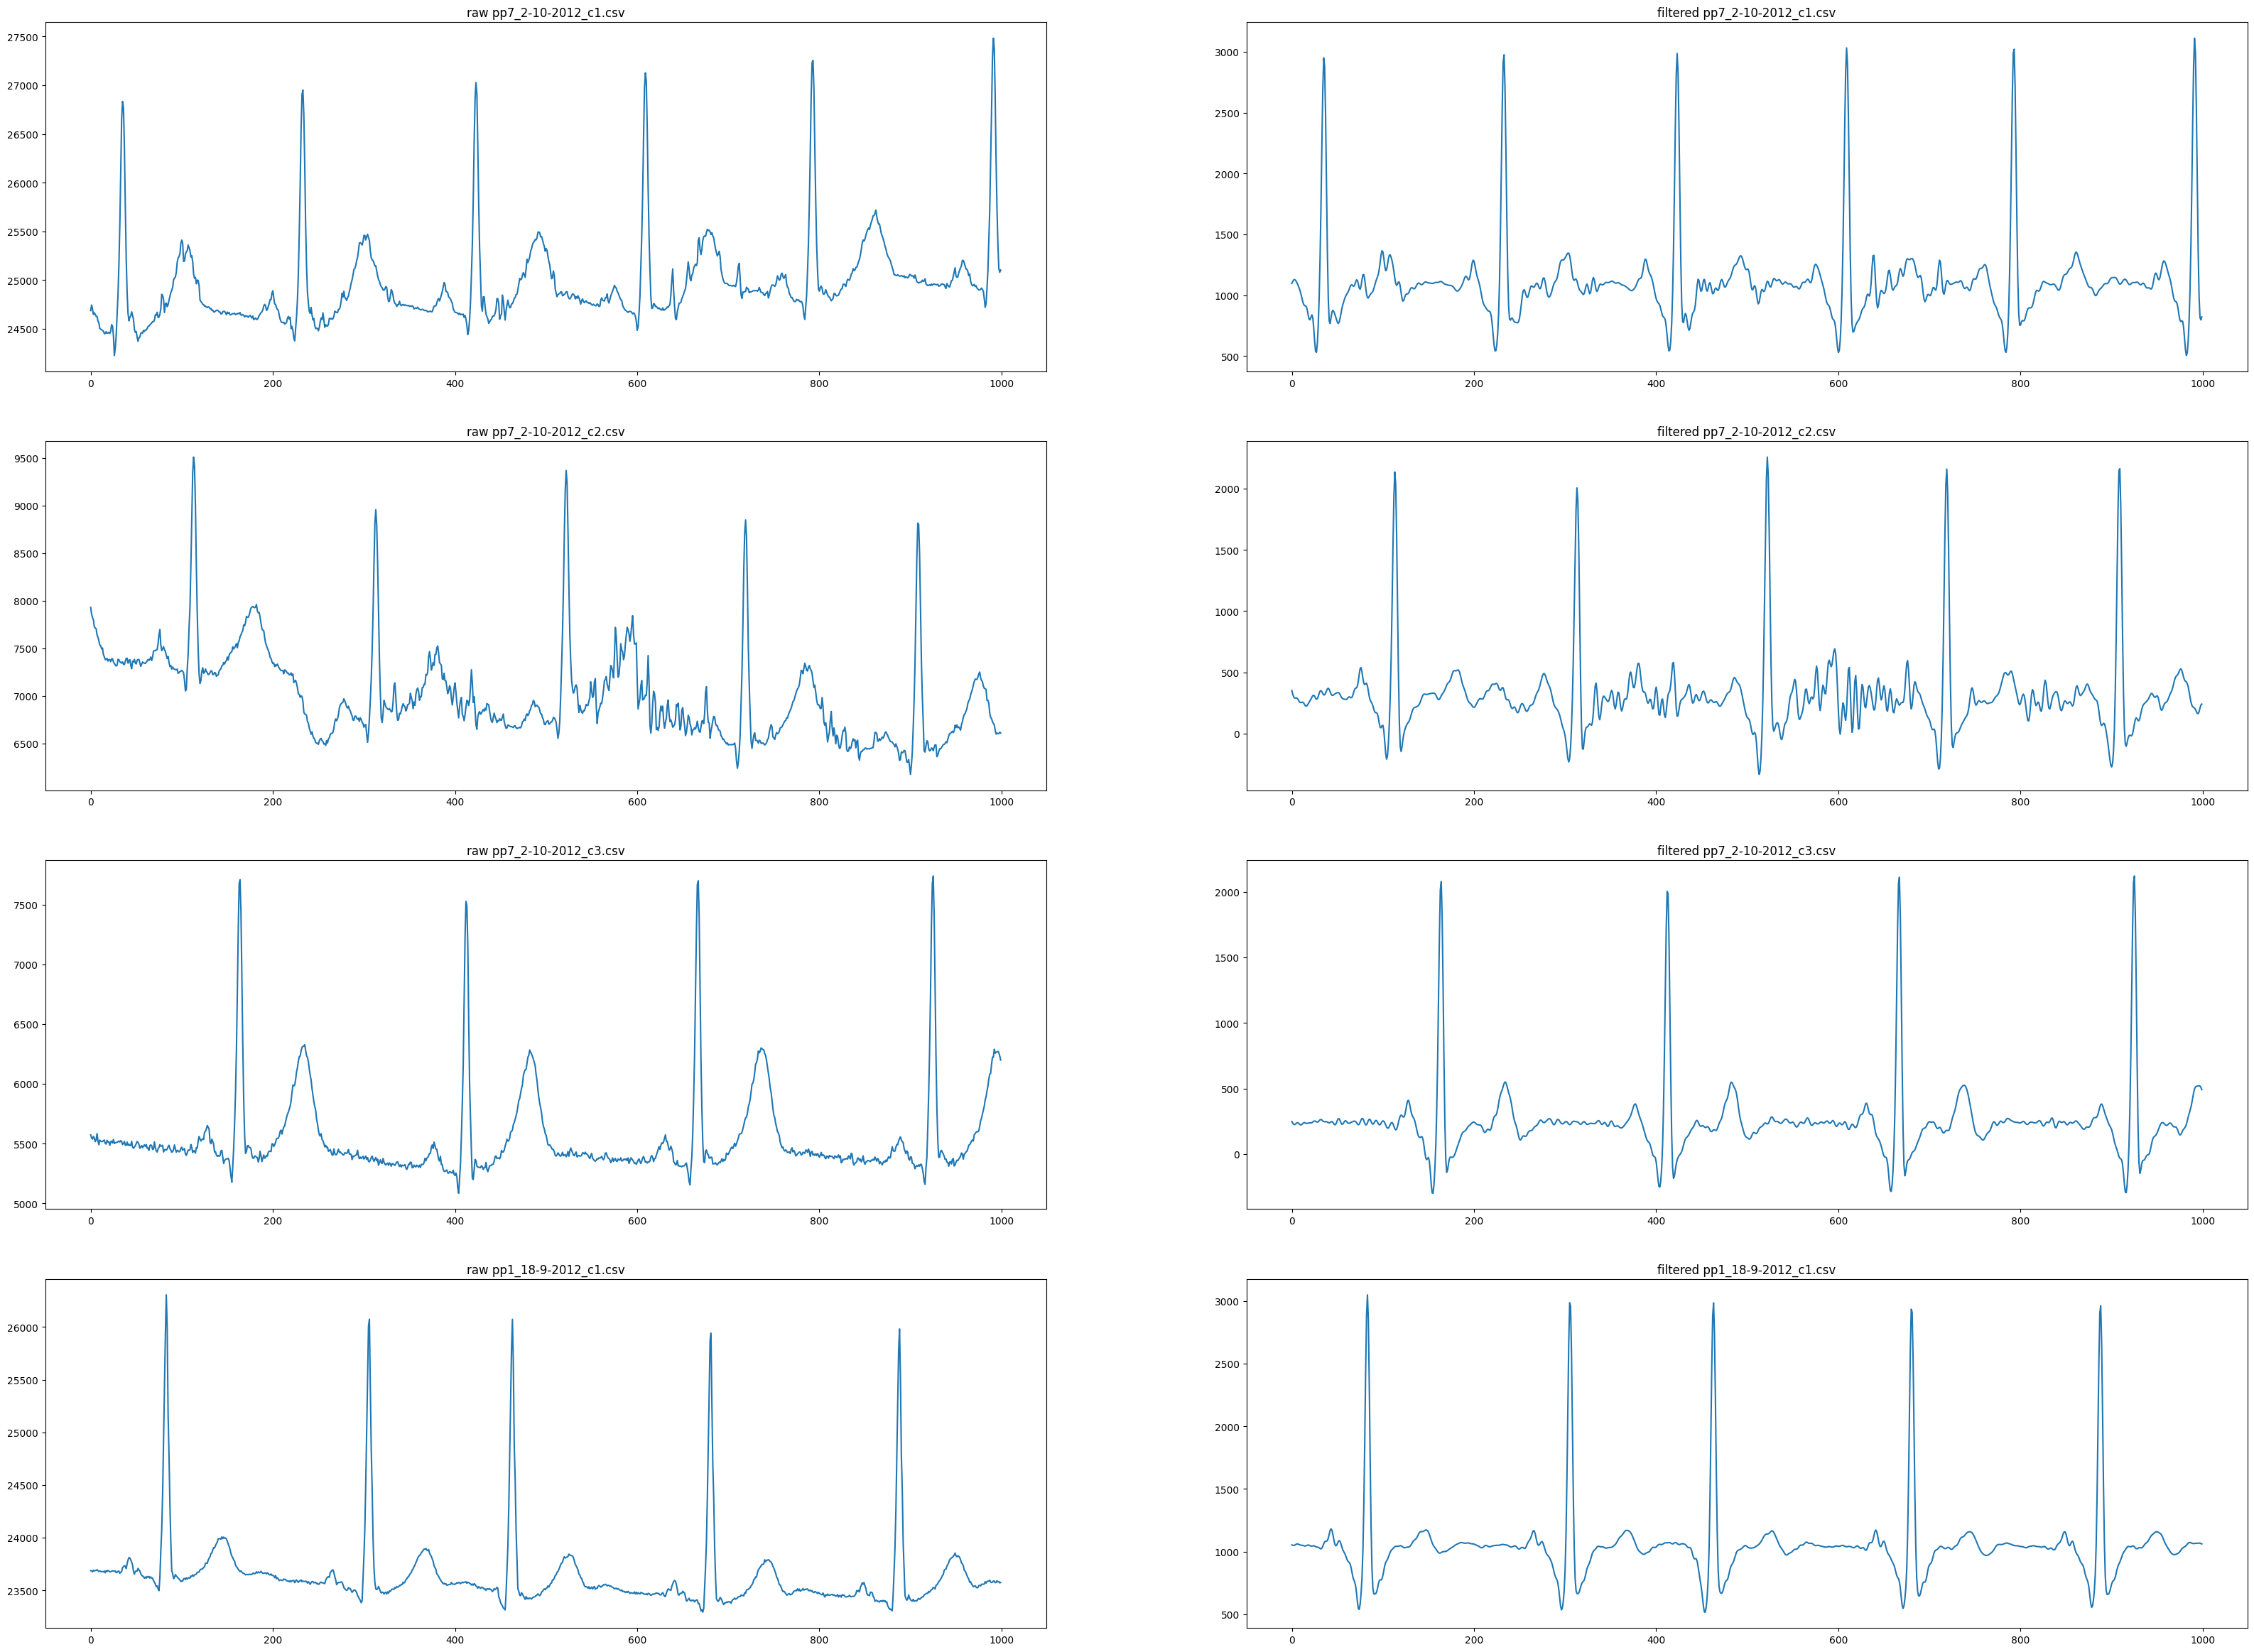

In [8]:
plt.figure(figsize=(40,60))
tot_len = int(len(raw)+len(filtered))
for i in range(tot_len):
    plt.subplot(tot_len,2,i+1)
    if(i%2==0):
        index = int(i/2)
        plt.plot(raw[index][:1000])
        plt.title("raw "+samples[index])
    else:
        index=int((i-1)/2)
        plt.plot(filtered[index][:1000])
        plt.title("filtered "+samples[index])
        

**Sampled vs Original**

**Present original sample**

In [7]:
# done cause every time I change data_preprocessing.py it didn't affect
import data_preprocessing as mc
import importlib
importlib.reload(mc) 

import model
importlib.reload(model)

<module 'model' from '/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/model.py'>

**Extract the data**

In [5]:

# done cause every time I change data_preprocessing.py it didn't affect
import data_preprocessing
import model
import utils
import importlib

importlib.reload(data_preprocessing)
importlib.reload(model)
importlib.reload(utils)

data_folder = os.path.join(os.path.dirname("data_folder"), 'swell_dataset')
data_preprocessing.extract_swell_dataset(overlap_pct= 0, window_size_sec= 10, data_save_path= data_folder,save= 1)


SWELL 2
dir path in import_filenames is  ./swell/PP9/sample/
the swell_file_names is: ['pp1_18-9-2012_c1.csv', 'pp1_18-9-2012_c2.csv', 'pp1_18-9-2014_c3.csv', 'pp2_19-9-2012_c1.csv', 'pp2_19-9-2012_c2.csv', 'pp2_19-9-2012_c3.csv', 'pp3_24-9-2012_c2.csv', 'pp3_24-9-2012_c3.csv', 'pp4_25-9-2012_c3.csv', 'pp5_26-9-2012_c1.csv', 'pp5_26-9-2012_c2.csv', 'pp5_26-9-2012_c3.csv', 'pp6_1-10-2012_c1.csv', 'pp6_1-10-2012_c2.csv', 'pp6_1-10-2012_c3.csv', 'pp10_8-10-2012-c1.csv', 'pp10_8-10-2012-c3.csv', 'pp12_9-10-212_c1.csv', 'pp12_9-10-212_c2.csv', 'pp12_9-10-212_c3.csv', 'pp13_10-10-2012_c1.csv', 'pp13_10-10-2012_c2.csv', 'pp13_10-10-2012_c3.csv', 'pp14_10-10-2012_c1.csv', 'pp14_10-10-2012_c2.csv', 'pp14_10-10-2012_c3.csv', 'pp15_15-10-2012_c1.csv', 'pp16_15-10-2012_c1.csv', 'pp16_15-10-2012_c3.csv', 'pp17_17-10-2012_c1.csv', 'pp17_17-10-2012_c2.csv', 'pp17_17-10-2012_c3.csv', 'pp18_19-10-2012_c1.csv', 'pp18_19-10-2012_c2.csv', 'pp18_19-10-2012_c3.csv', 'pp19_19-10-2012_c1.csv', 'pp19_19-10-201

  4%|▍         | 1/23 [00:01<00:42,  1.94s/it]

for  pp1  mean is  91.72344321795835 std is  133.98235816832732


  9%|▊         | 2/23 [00:03<00:32,  1.52s/it]

for  pp10  mean is  89.77699418301582 std is  148.4507246316638


 13%|█▎        | 3/23 [00:04<00:31,  1.60s/it]

for  pp12  mean is  126.34926561335945 std is  191.928978802175


 17%|█▋        | 4/23 [00:06<00:31,  1.68s/it]

for  pp13  mean is  105.93881998206659 std is  168.35028385300765


 22%|██▏       | 5/23 [00:08<00:29,  1.66s/it]

for  pp14  mean is  122.82355690845374 std is  178.65264657266346


 26%|██▌       | 6/23 [00:09<00:22,  1.34s/it]

for  pp15  mean is  73.70364232618815 std is  108.73190746849899


 30%|███       | 7/23 [00:10<00:20,  1.28s/it]

for  pp16  mean is  88.21233592868394 std is  133.54997425894342


 35%|███▍      | 8/23 [00:11<00:21,  1.44s/it]

for  pp17  mean is  95.81984356995832 std is  130.80715701144908


 39%|███▉      | 9/23 [00:13<00:20,  1.49s/it]

for  pp18  mean is  88.03278022101071 std is  122.77238861120276


 43%|████▎     | 10/23 [00:15<00:19,  1.53s/it]

for  pp19  mean is  78.29412185882813 std is  97.57948359891235


 48%|████▊     | 11/23 [00:16<00:19,  1.60s/it]

for  pp2  mean is  89.17256311056758 std is  138.36530227405765


 52%|█████▏    | 12/23 [00:17<00:14,  1.32s/it]

for  pp20  mean is  71.16327762651494 std is  97.80952677830375


 57%|█████▋    | 13/23 [00:19<00:14,  1.47s/it]

for  pp21  mean is  92.44080883592906 std is  132.30841155252767


 61%|██████    | 14/23 [00:20<00:11,  1.23s/it]

for  pp22  mean is  92.92844257373095 std is  145.67942243159632


 65%|██████▌   | 15/23 [00:20<00:08,  1.12s/it]

for  pp23  mean is  69.22294253137034 std is  89.48097968127317


 70%|██████▉   | 16/23 [00:22<00:07,  1.12s/it]

for  pp24  mean is  114.93665536101298 std is  183.24798865362104


 74%|███████▍  | 17/23 [00:22<00:05,  1.03it/s]

for  pp25  mean is  152.78388274081547 std is  215.41030201860255


 78%|███████▊  | 18/23 [00:23<00:05,  1.03s/it]

for  pp3  mean is  148.27820344324098 std is  227.00431883075348


 83%|████████▎ | 19/23 [00:24<00:03,  1.06it/s]

for  pp4  mean is  112.1714285519494 std is  169.88276231545265


 87%|████████▋ | 20/23 [00:26<00:03,  1.08s/it]

for  pp5  mean is  90.64449091470077 std is  131.03902252728741


 91%|█████████▏| 21/23 [00:27<00:02,  1.25s/it]

for  pp6  mean is  82.18906388170424 std is  125.2438268563638


 96%|█████████▌| 22/23 [00:29<00:01,  1.47s/it]

for  pp7  mean is  103.30200402086277 std is  141.7419781699824


100%|██████████| 23/23 [00:31<00:00,  1.36s/it]


for  pp9  mean is  79.35182281915192 std is  124.84500320386302


  0%|          | 0/55 [00:00<?, ?it/s]

name is  1


  2%|▏         | 1/55 [00:00<00:30,  1.79it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (352, 2560)
name is  1


  4%|▎         | 2/55 [00:00<00:21,  2.42it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (210, 2560)
name is  1


  5%|▌         | 3/55 [00:01<00:23,  2.19it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (336, 2560)
name is  2


  7%|▋         | 4/55 [00:01<00:24,  2.08it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (335, 2560)
name is  2


  9%|▉         | 5/55 [00:02<00:23,  2.15it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (282, 2560)
name is  2


 11%|█         | 6/55 [00:02<00:20,  2.37it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (226, 2560)
name is  3


 13%|█▎        | 7/55 [00:03<00:19,  2.52it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (232, 2560)
name is  3


 15%|█▍        | 8/55 [00:03<00:19,  2.46it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (285, 2560)
name is  4


 16%|█▋        | 9/55 [00:03<00:17,  2.63it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (215, 2560)
name is  5


 18%|█▊        | 10/55 [00:04<00:18,  2.41it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (321, 2560)
name is  5


 20%|██        | 11/55 [00:04<00:15,  2.78it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (159, 2560)
name is  5


 22%|██▏       | 12/55 [00:04<00:16,  2.62it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (294, 2560)
name is  6


 24%|██▎       | 13/55 [00:05<00:17,  2.40it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (316, 2560)
name is  6


 25%|██▌       | 14/55 [00:05<00:17,  2.30it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (309, 2560)
name is  6


 27%|██▋       | 15/55 [00:06<00:15,  2.50it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (214, 2560)
name is  10


 29%|██▉       | 16/55 [00:06<00:16,  2.34it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (317, 2560)
name is  10


 31%|███       | 17/55 [00:07<00:15,  2.46it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (234, 2560)
name is  12


 33%|███▎      | 18/55 [00:07<00:16,  2.26it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (337, 2560)
name is  12


 35%|███▍      | 19/55 [00:08<00:16,  2.21it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (309, 2560)
name is  12


 36%|███▋      | 20/55 [00:08<00:14,  2.43it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (212, 2560)
name is  13


 38%|███▊      | 21/55 [00:08<00:13,  2.47it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (259, 2560)
name is  13


 40%|████      | 22/55 [00:09<00:12,  2.57it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (233, 2560)
name is  13


 42%|████▏     | 23/55 [00:09<00:12,  2.52it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (274, 2560)
name is  14


 44%|████▎     | 24/55 [00:10<00:13,  2.32it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (332, 2560)
name is  14


 45%|████▌     | 25/55 [00:10<00:13,  2.21it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (326, 2560)
name is  14


 47%|████▋     | 26/55 [00:10<00:11,  2.45it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (205, 2560)
name is  15


 49%|████▉     | 27/55 [00:11<00:12,  2.29it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (331, 2560)
name is  16


 51%|█████     | 28/55 [00:11<00:12,  2.10it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (359, 2560)
name is  16


 53%|█████▎    | 29/55 [00:12<00:11,  2.33it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (211, 2560)
name is  17


 55%|█████▍    | 30/55 [00:12<00:11,  2.20it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (331, 2560)
name is  17


 56%|█████▋    | 31/55 [00:13<00:10,  2.35it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (236, 2560)
name is  17


 58%|█████▊    | 32/55 [00:13<00:10,  2.23it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (328, 2560)
name is  18


 60%|██████    | 33/55 [00:14<00:09,  2.27it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (274, 2560)
name is  18


 62%|██████▏   | 34/55 [00:14<00:09,  2.19it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (323, 2560)
name is  18


 64%|██████▎   | 35/55 [00:14<00:08,  2.38it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (226, 2560)
name is  19


 65%|██████▌   | 36/55 [00:15<00:08,  2.35it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (291, 2560)
name is  19


 67%|██████▋   | 37/55 [00:15<00:08,  2.21it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (335, 2560)
name is  19


 69%|██████▉   | 38/55 [00:16<00:06,  2.49it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (192, 2560)
name is  20


 71%|███████   | 39/55 [00:16<00:06,  2.46it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (279, 2560)
name is  21


 73%|███████▎  | 40/55 [00:17<00:06,  2.24it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (345, 2560)
name is  21


 75%|███████▍  | 41/55 [00:17<00:05,  2.53it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (187, 2560)
name is  21


 76%|███████▋  | 42/55 [00:17<00:04,  2.66it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (225, 2560)
name is  22


 78%|███████▊  | 43/55 [00:18<00:04,  2.42it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (328, 2560)
name is  23
-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (44, 2560)
name is  23


 82%|████████▏ | 45/55 [00:18<00:02,  3.91it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (47, 2560)
name is  23


 84%|████████▎ | 46/55 [00:18<00:02,  3.61it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (236, 2560)
name is  24


 85%|████████▌ | 47/55 [00:19<00:02,  3.11it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (294, 2560)
name is  24


 87%|████████▋ | 48/55 [00:19<00:02,  3.04it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (235, 2560)
name is  25


 89%|████████▉ | 49/55 [00:19<00:02,  2.71it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (307, 2560)
name is  7


 91%|█████████ | 50/55 [00:20<00:01,  2.96it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (178, 2560)
name is  7


 93%|█████████▎| 51/55 [00:20<00:01,  2.92it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (237, 2560)
name is  7


 95%|█████████▍| 52/55 [00:21<00:01,  2.56it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (329, 2560)
name is  9


 96%|█████████▋| 53/55 [00:21<00:00,  2.57it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (254, 2560)
name is  9


 98%|█████████▊| 54/55 [00:21<00:00,  2.70it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (219, 2560)
name is  9


100%|██████████| 55/55 [00:22<00:00,  2.48it/s]

-----------normalize was used------------------
-----------make_window was used------------------
before, shape is:  (0, 2560)
finally, shape is:  (290, 2560)


label_sheet_names:
['SWELLdata', 'Features and interest', 'Features and interest ordered', 'Notes on the data']
Dataframe:  <class 'pandas.core.frame.DataFrame'>
getting labels...


 25%|██▌       | 1/4 [00:06<00:19,  6.46s/it]/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/data_preprocessing.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels = labels.append(participant_labellings, ignore_index = True, sort=False)
 50%|█████     | 2/4 [00:06<00:05,  2.85s/it]/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/data_preprocessing.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels = labels.append(participant_labellings, ignore_index = True, sort=False)
/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/data_preprocessing.py:203: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  labels = labels.append(participant_labellings, ignore_index = True, sort=False)
100%|██

swell_labels['PP']:
0      PP1
1      PP1
2      PP1
3      PP2
4      PP2
      ... 
71    PP24
72    PP25
73    PP25
74    PP25
75     NaN
Name: PP, Length: 76, dtype: object
i[:start].upper():
PP1
swell_labels['Blok']:
0     1.0
1     2.0
2     3.0
3     1.0
4     2.0
     ... 
71    3.0
72    1.0
73    2.0
74    3.0
75    NaN
Name: Blok, Length: 76, dtype: float64
int(i[end+1:-4]):
1
conditon is: 
0      True
1     False
2     False
3     False
4     False
      ...  
71    False
72    False
73    False
74    False
75    False
Length: 76, dtype: bool
the type of con is  <class 'pandas.core.series.Series'>
index is  [0]
np.where(condition):  (array([0]),)
swell_labels['filename'].iloc[index[0]]
default
swell_labels['filename'].iloc[index[0]] pp1_18-9-2012_c1.csv
swell_labels['PP']:
0      PP1
1      PP1
2      PP1
3      PP2
4      PP2
      ... 
71    PP24
72    PP25
73    PP25
74    PP25
75     NaN
Name: PP, Length: 76, dtype: object
i[:start].upper():
PP1
swell_labels['Blok']:
0 

100%|██████████| 55/55 [00:01<00:00, 30.13it/s]


{'pp1_18-9-2012_c1.csv': array([[-0.55964723, -0.49198235, -0.43125869, ..., -0.41929155,
        -0.431163  , -0.43476708],
       [-0.43760047, -0.44871935, -0.46305901, ..., -0.21345766,
        -0.21913758, -0.23939088],
       [-0.2693031 , -0.27152466, -0.26791388, ...,  3.59836006,
         3.51150881,  3.36508031],
       ...,
       [-0.42225562, -0.44096949, -0.45757167, ..., -0.34279822,
        -0.34906053, -0.34932199],
       [-0.34440448, -0.35562982, -0.36452803, ..., -0.58130942,
        -0.58473093, -0.58433216],
       [-0.58454349, -0.58763737, -0.58422691, ..., -0.53173912,
        -0.54653194, -0.56404307]]), 'pp1_18-9-2012_c2.csv': array([[ 3.48195388,  3.392788  ,  3.22924691, ..., -0.60986506,
        -0.60707032, -0.6080459 ],
       [-0.61126769, -0.6114341 , -0.61003925, ..., -0.54702576,
        -0.54845112, -0.54674454],
       [-0.50917647, -0.42219552, -0.2853627 , ..., -0.32037883,
        -0.16803296,  0.04670623],
       ...,
       [-0.5932251 , -0.5

(14595, 2572)

**Load**

In [17]:
swell_data = data_preprocessing.load_data(os.path.join("swell_dataset","swell_dict.npy"))
print("type is: ",type(swell_data))
print("shape: ",swell_data.shape)

type is:  <class 'numpy.ndarray'>
shape:  (14595, 2572)


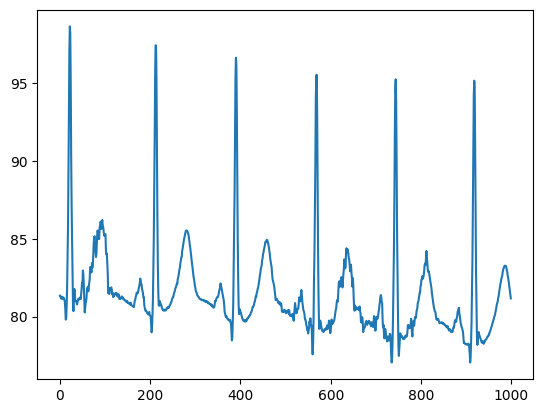

In [22]:
plt.plot(swell_data[134][1000:2000])

In [33]:
swell_data = data_preprocessing.swell_prepare_for_10fold(swell_data)  #person, y_input_stress, y_arousal, y_valence, 
print("shape: ",swell_data.shape)

shape:  (14595, 2444)


In [32]:
#check there is no +- inf or nan
print(np.where(np.isinf(swell_data)))
print(np.where(np.isneginf(swell_data)))
print(np.where(np.isnan(swell_data)))


(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


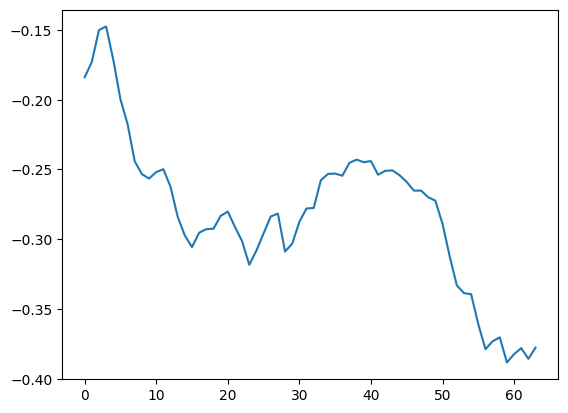

In [28]:
a = (swell_data>=0)&(swell_data<=9)
b = (np.where(a))
len(b[0])
plt.plot(swell_data[0,2500:3000])

****Main****

In [4]:
###again after script...
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  8 23:57:24 2019

@author: Pritam
"""
import os
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import model
import utils
import data_preprocessing
# done cause every time I change data_preprocessing.py it didn't affect
import importlib
importlib.reload(data_preprocessing)
importlib.reload(model)
importlib.reload(utils)
 
## mention paths
dirname = "/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/"
data_folder     = os.path.join(os.path.dirname(dirname), 'data_folder')
summaries       = os.path.join(os.path.dirname(dirname), 'summaries')
output          = os.path.join(os.path.dirname(dirname), 'output')
model_dir       = os.path.join(os.path.dirname(dirname), 'models')
swell_data = data_preprocessing.load_data(os.path.join("swell_dataset","swell_dict.npy"))

#clean after last run
data_preprocessing.clean_last_model()
data_preprocessing.clean_dir('./output/ER/')
data_preprocessing.clean_dir('./output/STR_loss/')
data_preprocessing.clean_dir('./output/STR_result/')

## transformation task params
noise_param = 15 #noise_amount
scale_param = 1.1 #scaling_factor
permu_param = 20 #permutation_pieces
tw_piece_param = 9 #time_warping_pieces
twsf_param = 1.05 #time_warping_stretch_factor
no_of_task = ['original_signal', 'noised_signal', 'scaled_signal', 'negated_signal', 'flipped_signal', 'permuted_signal', 'time_warped_signal'] 
transform_task = [0, 1, 2, 3, 4, 5, 6] #transformation labels
single_batch_size = len(transform_task)

## hyper parameters
batchsize = 128  
actual_batch_size =  batchsize * single_batch_size
log_step = 100
epoch = 100
initial_learning_rate = 0.001
drop_rate = 0.6
regularizer = 1
L2 = 0.0001
lr_decay_steps = 10000
lr_decay_rate = 0.9
loss_coeff = [0.195, 0.195, 0.195, 0.0125, 0.0125, 0.195, 0.195]
window_size = 2560
extract_data = 0
current_time    = utils.current_time()

## prepared as 10 fold cv
swell_data              = data_preprocessing.swell_prepare_for_10fold(swell_data)  #person, y_input_stress, y_arousal, y_valence, 
a = (np.where(np.isinf(swell_data)))
b = (np.where(np.isneginf(swell_data)))
c = (np.where(np.isnan(swell_data)))
total_fold = 10
kf = KFold(n_splits=total_fold, shuffle=True, random_state=True)
swell_train_index, swell_test_index     = utils.get_train_test_index(swell_data, kf)

""" self supervised task start """

graph = tf.Graph()
print('creating graph...')
with graph.as_default():
    
    ## initialize tensor
    input_tensor        = tf.compat.v1.placeholder(tf.float32, shape = (None, window_size, 1), name = "input")
    y                   = tf.compat.v1.placeholder(tf.float32, shape = (None, np.shape(transform_task)[0]), name = "output") 
    drop_out            = tf.compat.v1.placeholder_with_default(1.0, shape=(), name="Drop_out")
    isTrain             = tf.compat.v1.placeholder(tf.bool, name = 'isTrain')
    global_step         = tf.Variable(0, dtype=np.float32, trainable=False, name="steps")

    conv1, conv2, conv3, main_branch, task_0, task_1, task_2, task_3, task_4, task_5, task_6 = model.self_supervised_model(input_tensor, isTraining= isTrain, drop_rate= drop_out)
    logits = [task_0, task_1, task_2, task_3, task_4, task_5, task_6]
    ## main branch is the output after all conv layers
    featureset_size = main_branch.get_shape()[1]
    y_label = utils.get_label(y= y, actual_batch_size= actual_batch_size)
    all_loss = utils.calculate_loss(y_label, logits)
    output_loss = utils.get_weighted_loss(loss_coeff, all_loss)  
    
    if regularizer:
        l2_loss = 0
        weights = []
        for v in tf.compat.v1.trainable_variables():
            weights.append(v)
            if 'kernel' in v.name:
                l2_loss += tf.nn.l2_loss(v)
        output_loss = output_loss + l2_loss * L2
        
    y_pred                = utils.get_prediction(logits = logits)
    learning_rate         = tf.compat.v1.train.exponential_decay(initial_learning_rate, global_step, decay_steps=lr_decay_steps, decay_rate=lr_decay_rate, staircase=True)

    optimizer             = tf.compat.v1.train.AdamOptimizer(learning_rate) 
    
    with tf.control_dependencies(tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.UPDATE_OPS)):
        train_op    = optimizer.minimize(output_loss, global_step)
        
    with tf.compat.v1.variable_scope('Session_saver'):
        saver       = tf.compat.v1.train.Saver(max_to_keep=10)

    tf.compat.v1.summary.scalar('learning_rate/lr', learning_rate)
    tf.compat.v1.summary.scalar('loss/training_batch_loss', output_loss)
    
    summary_op      = tf.compat.v1.summary.merge_all()    
        
print('graph creation finished')

""" Training """
#only one iteration for checking
#for k in range(total_fold):
for k in range(1): 
    flag                    = k
    ## save STR results
    tr_ssl_result_filename  =  os.path.join(output, "STR_result"   , str("tr_" + str(k) +"_"  + current_time + ".npy"))
    te_ssl_result_filename  =  os.path.join(output, "STR_result"   , str("te_" + str(k) +"_"  + current_time + ".npy"))
    tr_ssl_loss_filename    =  os.path.join(output, "STR_loss"     , str("tr_" + str(k) +"_"  + current_time + ".npy"))
    te_ssl_loss_filename    =  os.path.join(output, "STR_loss"     , str("te_" + str(k) +"_"  + current_time + ".npy"))
            
    str_logs        = os.path.join(summaries, "STR", current_time)
    er_logs         = os.path.join(summaries, "ER", current_time)
    utils.makedirs(str_logs)
    
    ## combine all ECG data
    train_ECG   = np.vstack((swell_data[swell_train_index[k], 4:])) 
    test_ECG    = np.vstack((swell_data[swell_test_index[k], 4:])) 
    train_ECG   = shuffle(train_ECG)
    
    ## fetch emotion recognition labels
    train_swell_input_stress, test_swell_input_stress = utils.one_hot_encoding(arr = swell_data[:, 1], tr_index = swell_train_index[k], te_index = swell_test_index[k])
    train_swell_arousal, test_swell_arousal           = utils.one_hot_encoding(arr = swell_data[:, 2], tr_index = swell_train_index[k], te_index = swell_test_index[k])
    train_swell_valence, test_swell_valence           = utils.one_hot_encoding(arr = swell_data[:, 3], tr_index = swell_train_index[k], te_index = swell_test_index[k])    
    training_length = train_ECG.shape[0]
    testing_length  = test_ECG.shape[0]
    
    print('Initializing all parameters.')
    tf.compat.v1.reset_default_graph()
    with tf.compat.v1.Session(graph=graph) as sess:   
        summary_writer = tf.compat.v1.summary.FileWriter(str_logs, sess.graph)
    
        sess.run(tf.compat.v1.global_variables_initializer())
        sess.run(tf.compat.v1.local_variables_initializer())
        
        print('self supervised training started')
        
        train_loss_dict = {}
        test_loss_dict = {}
    
        tr_ssl_result = {}
        te_ssl_result = {}    
        
        ## epoch loop
        for epoch_counter in tqdm(range(epoch)):
            
            tr_loss_task = np.zeros((len(transform_task), 1), dtype  = np.float32)
            train_pred_task = np.zeros((len(transform_task), actual_batch_size), dtype  = np.float32) -1
            train_true_task = np.zeros((len(transform_task), actual_batch_size), dtype  = np.float32) -1
            tr_output_loss = 0
    
            tr_total_gen_op = utils.make_total_batch(data = train_ECG, length = training_length, batchsize = batchsize, 
                                               noise_amount=noise_param, 
                                               scaling_factor=scale_param, 
                                               permutation_pieces=permu_param, 
                                               time_warping_pieces=tw_piece_param, 
                                               time_warping_stretch_factor= twsf_param, 
                                               time_warping_squeeze_factor= 1/twsf_param)
    
            for training_batch, training_labels, tr_counter, tr_steps in tr_total_gen_op:
                
                ## run the model here 
                training_batch, training_labels = utils.unison_shuffled_copies(training_batch, training_labels)
                training_batch = training_batch.reshape(training_batch.shape[0], training_batch.shape[1], 1)
                fetches = [all_loss, output_loss, y_pred, train_op]
                if tr_counter % log_step == 0:
                    fetches.append(summary_op)
                    
                fetched = sess.run(fetches, {input_tensor: training_batch, y: training_labels, drop_out: drop_rate, isTrain: True})
                
                if tr_counter % log_step == 0: # 
                    summary_writer.add_summary(fetched[-1], tr_counter)
                    summary_writer.flush()
    
                tr_loss_task = utils.fetch_all_loss(fetched[0], tr_loss_task) 
                tr_output_loss += fetched[1]
                
                train_pred_task = utils.fetch_pred_labels(fetched[2], train_pred_task)
                train_true_task = utils.fetch_true_labels(training_labels, train_true_task)

            ## loss after epoch
            tr_epoch_loss = np.true_divide(tr_loss_task, tr_steps)
            train_loss_dict.update({epoch_counter: tr_epoch_loss})
            tr_output_loss = np.true_divide(tr_output_loss, tr_steps)
            
            ## performance matrix after each epoch
            tr_epoch_accuracy, tr_epoch_f1_score = utils.get_results_ssl(train_true_task, np.asarray(train_pred_task, int))
            tr_ssl_result = utils.write_result(tr_epoch_accuracy, tr_epoch_f1_score, epoch_counter, tr_ssl_result)
            utils.write_summary(loss = tr_epoch_loss, total_loss = tr_output_loss, f1_score = tr_epoch_f1_score, epoch_counter = epoch_counter, isTraining = True, summary_writer = summary_writer)
            utils.write_result_csv(k, epoch_counter, os.path.join(output, "STR_result", "tr_str_f1_Score.csv"), tr_epoch_f1_score)
    
            model_path = os.path.join(model_dir , "epoch_" + str(epoch_counter))
            utils.makedirs(model_path)
            save_path = saver.save(sess, os.path.join(model_path, "SSL_model.ckpt"))
            print("Self-supervised trained model is saved in path: %s" % save_path) 
            
            ## initialize array
            te_loss_task    = np.zeros((len(transform_task), 1), dtype  = np.float32)
            test_pred_task  = np.zeros((len(transform_task), actual_batch_size), dtype  = np.float32)-1
            test_true_task  = np.zeros((len(transform_task), actual_batch_size), dtype  = np.float32)-1
            te_output_loss  = 0
           
            te_total_gen_op = utils.make_total_batch(data = test_ECG, 
                                                     length = testing_length, 
                                                     batchsize = batchsize, 
                                                     noise_amount=noise_param, 
                                                     scaling_factor=scale_param, 
                                                     permutation_pieces=permu_param, 
                                                     time_warping_pieces=tw_piece_param, 
                                                     time_warping_stretch_factor= twsf_param, 
                                                     time_warping_squeeze_factor= 1/twsf_param)
    
            for testing_batch, testing_labels, te_counter, te_steps in te_total_gen_op:
                
                ## run the model here 
                fetches = [all_loss, output_loss, y_pred]
                    
                #fetched = sess.run(fetches, {input_tensor: testing_batch, y: testing_labels, drop_out: 0.0, isTrain: False})
                #try:
                fetched = sess.run(fetches, {input_tensor: testing_batch, y: testing_labels, drop_out: 0.5, isTrain: False})
    
                te_loss_task = utils.fetch_all_loss(fetched[0], te_loss_task)
                te_output_loss += fetched[1]
                test_pred_task = utils.fetch_pred_labels(fetched[2], test_pred_task)
                test_true_task = utils.fetch_true_labels(testing_labels, test_true_task)
    
            ## loss after epoch
            te_epoch_loss = np.true_divide(te_loss_task, te_steps)
            test_loss_dict.update({epoch_counter: te_epoch_loss})
            te_output_loss = np.true_divide(te_output_loss, te_steps)
    
            ## performance matrix after each epoch
            te_epoch_accuracy, te_epoch_f1_score = utils.get_results_ssl(test_true_task, test_pred_task)            
            te_ssl_result = utils.write_result(te_epoch_accuracy, te_epoch_f1_score, epoch_counter, te_ssl_result)    
            utils.write_summary(loss = te_epoch_loss, total_loss = te_output_loss, f1_score = te_epoch_f1_score, epoch_counter = epoch_counter, isTraining = False, summary_writer = summary_writer)
            utils.write_result_csv(k, epoch_counter, os.path.join(output, "STR_result", "te_str_f1_score.csv"), te_epoch_f1_score)
            
            """
            supervised task of self supervised learning
            """
            """  swell """
               
            ## training - testing ECG
            x_tr = swell_data[swell_train_index[k], 4:]
            x_te = swell_data[swell_test_index[k], 4:]
                
            ## features extracted from conv layers
            x_tr_feature = utils.extract_feature(x_original = x_tr, featureset_size = featureset_size, batch_super = batchsize, input_tensor = input_tensor, isTrain = isTrain, drop_out = drop_out, extract_layer = main_branch, sess = sess)
            x_te_feature = utils.extract_feature(x_original = x_te, featureset_size = featureset_size, batch_super = batchsize, input_tensor = input_tensor, isTrain = isTrain, drop_out = drop_out, extract_layer = main_branch, sess = sess)
                
            ## supervised emotion recognition
            model.supervised_model_swell(x_tr_feature = x_tr_feature, y_tr = train_swell_input_stress, x_te_feature = x_te_feature, y_te = test_swell_input_stress, identifier = 'swell_input_stress', kfold = flag, result = output, summaries = er_logs, current_time = current_time)        
            model.supervised_model_swell(x_tr_feature = x_tr_feature, y_tr = train_swell_arousal, x_te_feature = x_te_feature, y_te = test_swell_arousal, identifier = 'swell_arousal', kfold = flag, result = output, summaries = er_logs, current_time = current_time)  
            model.supervised_model_swell(x_tr_feature = x_tr_feature, y_tr = train_swell_valence, x_te_feature = x_te_feature, y_te = test_swell_valence, identifier = 'swell_valence', kfold = flag, result = output, summaries = er_logs, current_time = current_time)  
           
        ## save str loss, acc and f1 score    
        np.save(tr_ssl_loss_filename, train_loss_dict)
        np.save(te_ssl_loss_filename, test_loss_dict)
    
        np.save(tr_ssl_result_filename, tr_ssl_result)
        np.save(te_ssl_result_filename, te_ssl_result)


dir path in import_filenames is  ./models
['epoch_0']
creating graph...


/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/model.py:19: UserWarning: `tf.layers.conv1d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv1D` instead.
  conv  = tf.compat.v1.layers.conv1d(inputs = input_tensor, filters = filter_size, kernel_size = kernel_size, strides = stride, padding='same', name=name, reuse=reuse)
/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/model.py:47: UserWarning: `tf.layers.max_pooling1d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling1D` instead.
  conv1     = tf.compat.v1.layers.max_pooling1d(conv1, pool_size = conv1.get_shape()[1], strides=stride_mp, padding='valid', name = 'GAP1')
/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/model.py:48: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  conv1     = tf.compat.v1.layers.flatten(conv1, name = 'flat_lay

graph creation finished
Initializing all parameters.


2022-12-28 21:19:56.712177: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21403 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:07:00.0, compute capability: 8.6


self supervised training started


  0%|          | 0/100 [00:00<?, ?it/s]/home1/eitan.c@staff.technion.ac.il/ECG_proj/dockvenv/code/signal_transformation_task.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  permuted_signal = np.asarray(permuted_signal)[sequence]
  0%|          | 0/100 [00:28<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
%pip install tensorflow

%pip install -U scikit-learn scipy matplotlib
%pip install opencv-python

In [ ]:
%pip install tqdm

In [ ]:
      ## save str loss, acc and f1 score    
np.save(tr_ssl_loss_filename, train_loss_dict)
np.save(te_ssl_loss_filename, test_loss_dict)
    
np.save(tr_ssl_result_filename, tr_ssl_result)
np.save(te_ssl_result_filename, te_ssl_result)